In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Ans 1. Importing Iris dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Standard Scaler to scale input data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.insert(X_scaled, 0, values = 1, axis = 1)
print(X_scaled[:5])

array([[ 1.        , -0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [ 1.        , -1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [ 1.        , -1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [ 1.        , -1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [ 1.        , -1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Implementing Multiclass Logistic Regression and calculating beta values for 3 classes seperately

In [ ]:
beta_list = []
n_classes = np.unique(y)
for c in n_classes:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, np.where(y == c, 1, 0), test_size = 0.3, random_state = 42)
    n = 1000
    alpha = 0.01
    m, k = X_train.shape
    beta = np.zeros(k)
    for i in range(n):
        cost_gradient = np.zeros(k)
        z = X_train.dot(beta)
        predicted = 1 / (1 + np.exp(-z))
        difference = predicted - y_train
        for j in range(k):
            cost_gradient[j] = np.sum(difference.dot(X_train[:, j]))
        for j in range(k):
            beta[j] -= (alpha / m) * cost_gradient[j]
    beta_list.append(beta)
print(beta_list)

[array([-0.85477493, -0.61257375,  0.93331026, -1.04703986, -0.96864114]), array([-0.69045046, -0.01777341, -0.98912478,  0.15452772, -0.12231698]), array([-0.8642459 ,  0.57357461,  0.23352723,  0.79141341,  1.01175857])]


Using beta values, y predicted values are calculated and classes are judged based on which y predicted values

In [ ]:
y_predict_list = []
for beta in beta_list:
    y_predict = 1 / (1 + np.exp(-(X_test.dot(beta))))
    y_predict_list.append(y_predict)
print(y_predict_list)
y_label = np.zeros(len(y_test))
for i in range(len(y_test)):
    m = 0
    for j in range(len(n_classes)):
        if(m < y_predict_list[j][i]):
            m = y_predict_list[j][i]
            y_label[i] = j
print(y_label)

[array([0.10343793, 0.96152907, 0.00151827, 0.1058342 , 0.04771196,
       0.92913204, 0.2598954 , 0.02298979, 0.02217466, 0.15766841,
       0.05441357, 0.93095305, 0.95639854, 0.93598798, 0.97775169,
       0.14882626, 0.01877146, 0.13830777, 0.13340513, 0.01487757,
       0.9457723 , 0.06824575, 0.94325764, 0.01686664, 0.03296128,
       0.02032529, 0.00929331, 0.01914344, 0.91264872, 0.92888857,
       0.9844723 , 0.98900447, 0.11538462, 0.96136798, 0.96303135,
       0.01757334, 0.14351718, 0.96052205, 0.97377684, 0.99012973,
       0.03618193, 0.23374275, 0.08763023, 0.97739411, 0.969909  ]), array([0.49314568, 0.08208729, 0.60099827, 0.42096159, 0.48352779,
       0.17788371, 0.41167196, 0.29531568, 0.78086579, 0.53406499,
       0.26105709, 0.36180522, 0.14855711, 0.31246904, 0.08173801,
       0.225378  , 0.36451613, 0.64845754, 0.48688514, 0.47107195,
       0.26516269, 0.36312071, 0.18044217, 0.47508547, 0.0892674 ,
       0.3477551 , 0.65537416, 0.26405827, 0.35440336, 0.31

Now Accuracy is calculated based on class label predicted by comparing it with y_test values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
c = 0
for i in range(len(y_test)):
    if y_label[i] == y_test[i]:
        c += 1
print(f"Accuracy: {c / len(y_test) * 100}%")

Accuracy: 84.44444444444444%


Ans 2. Importing Exam dataset

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ColabFiles/exam.txt", names = ['Exam 1', 'Exam 2', 'Admitted'])
print(df.head())

,Exam 1,Exam 2,Admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Plotting the dataset

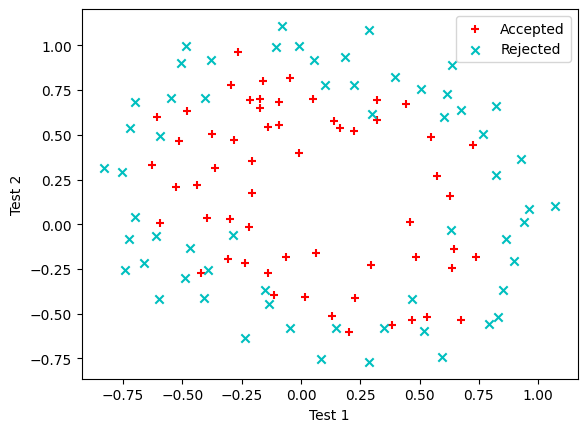

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
pos , neg = (y == 1).reshape(118, 1) , (y == 0).reshape(118, 1)
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], c = "r", marker = "+")
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c = "c", marker = "x")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted", "Rejected"], loc = 0)

Creating 6 degree polynomial function dataset

In [ ]:
for i in range(1, 7):
    for j in range(0, i + 1):
        df['(x1^' + str(i - j) + ')*(x2^' + str(j) + ')'] = np.power(X[:, 0], i - j) * np.power(X[:, 1], j)
df = df.iloc[:, 2:]
print(df.head())

,Admitted,(x1^1)*(x2^0),(x1^0)*(x2^1),(x1^2)*(x2^0),(x1^1)*(x2^1),(x1^0)*(x2^2),(x1^3)*(x2^0),(x1^2)*(x2^1),(x1^1)*(x2^2),(x1^0)*(x2^3),...,(x1^2)*(x2^3),(x1^1)*(x2^4),(x1^0)*(x2^5),(x1^6)*(x2^0),(x1^5)*(x2^1),(x1^4)*(x2^2),(x1^3)*(x2^3),(x1^2)*(x2^4),(x1^1)*(x2^5),(x1^0)*(x2^6)
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


Seperating input data and target variables of dataset

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X = np.insert(X, 0, values = 1, axis = 1)
print(X[:5])

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01,
         2.62830529e-03,  3.58643425e-02,  4.89384194e-01,
         1.34745327e-04,  1.83865725e-03,  2.50892595e-02,
         3.42353606e-01,  6.90798869e-06,  9.42624411e-05,
         1.28625106e-03,  1.75514423e-02,  2.39496889e-01,
         3.54151856e-07,  4.83255257e-06,  6.59422333e-05,
         8.99809795e-04,  1.22782870e-02,  1.67542444e-01,
         1.81563032e-08,  2.47750473e-07,  3.38066048e-06,
         4.61305487e-05,  6.29470940e-04,  8.58939846e-03,
         1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01,
         8.60107856e-03, -6.35227055e-02,  4.69142804e-01,
        -7.97681228e-04,  5.89122275e-03, -4.35092419e-02,
         3.21334672e-01,  7.39785525e-05, -5.46363780e-04,
         4.03513411e-03, -2.98012201e-02,  2.20094970e-01,
        -6.86091891e-06,  5.06708697e-05, -3.74226408e-04,
         2.76382476e-03, -2.04120477e-02,  1.50751849e-01,
         6.36295342e-07, -4.69

Sigmoid and Cost function to calculate logistic regression and ridge regularization

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunction(theta, X, y, Lambda):
    m = len(y)
    h_theta = sigmoid(np.dot(X, theta))
    term1 = np.dot(-y.T, np.log(h_theta))
    term2 = np.dot((1 - y).T, np.log(1 - h_theta))
    reg_term = (Lambda / (2 * m)) * np.sum(np.square(theta[1:]))
    cost = (np.sum(term1 - term2) / m) + reg_term

    j0 = 1 / m * np.dot(X.T, h_theta - y)[0]
    j1 = 1 / m * np.dot(X.T, h_theta - y)[1:] + Lambda / m * theta[1:]
    grad = np.insert(j1, 0, j0)
    return cost, grad

Using Gradient descent approach to update theta for each iteration

In [ ]:
def gradientDescent(X, y, theta, alpha, n, Lambda):
    m = len(y)
    cost_list = []
    for i in range(n):
        cost, grad = costFunction(theta, X, y, Lambda)
        theta -= alpha * grad
        cost_list.append(cost)
    return theta , cost_list[-1]

Printing theta and cost values without regularization

In [ ]:
theta = np.zeros(len(X[0]))
n = 1000
alpha = 10
Lambda = 0
theta , cost = gradientDescent(X, y, theta, alpha, n, Lambda)
print("The theta with no regularization:\n", theta)
print("The cost with no regularization:\n", cost)

The theta with no regularization:
 [ 4.15409898  2.10443     5.23013432 -5.81510774 -7.66192722 -7.27692226
  2.46504925 -0.22115788  3.22583296 -3.0909215  -4.52209387  3.92259471
 -4.10917866 -2.721752   -6.32857122 -1.79375642 -0.54006147  5.72317158
 -4.21803214 -4.31783459  3.18997027 -5.97666412  1.30151601 -0.94717104
  3.25734627 -4.66948518 -4.06371763  0.79915793]
The cost with no regularization:
 0.31425769402090975


Plotting the function

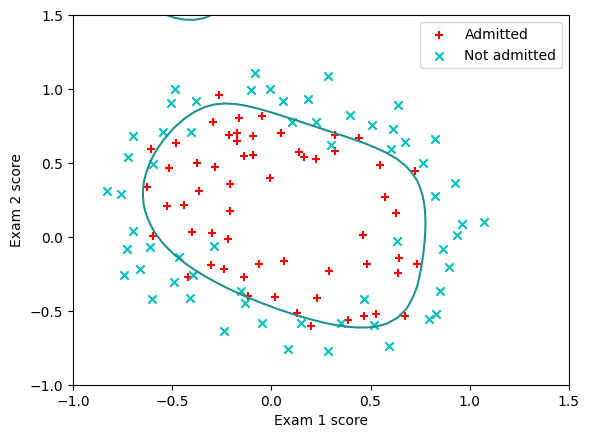

In [ ]:
def mapFeaturePlot(x1, x2, degree):
    out = np.ones(1)
    for i in range(1, degree + 1):
        for j in range(i + 1):
            terms = (x1 ** (i - j) * x2 ** j)
            out = np.hstack((out, terms))
    return out

plt.scatter(X[pos[:, 0],1], X[pos[:, 0], 2], c = "r", marker = "+", label = "Admitted")
plt.scatter(X[neg[:, 0],1], X[neg[:, 0], 2], c = "c", marker = "x", label = "Not admitted")
u_vals = np.linspace(-1, 1.5, 50)
v_vals= np.linspace(-1, 1.5, 50)
z = np.zeros((len(u_vals), len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i, j] = mapFeaturePlot(u_vals[i], v_vals[j], 6) @ theta
plt.contour(u_vals, v_vals, z.T, 0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = 0)

Printing theta and cost values with ridge regularization

In [ ]:
theta = np.zeros(len(X[0]))
n = 1000
alpha = 10
Lambda = 0.2
theta , cost = gradientDescent(X, y, theta, alpha, n, Lambda)
print("The theta with ridge regularization:\n", theta)
print("The cost with ridge regularization:\n", cost)

The theta with ridge regularization:
 [ 2.30527287  1.46927247  2.39021701 -3.61912747 -2.48951575 -3.25548991
  0.51319107 -0.88164104 -0.60127173 -0.29294479 -2.7162213   0.17515769
 -1.35451838 -0.85270703 -2.26346786 -0.4450542  -0.41305409  0.22134902
 -0.76170353 -0.83670767 -0.35703646 -2.05642632  0.24259368 -0.59926748
  0.1922323  -0.79484774 -0.58611138 -1.26034263]
The cost with ridge regularization:
 0.4278762571045141


Plotting the function

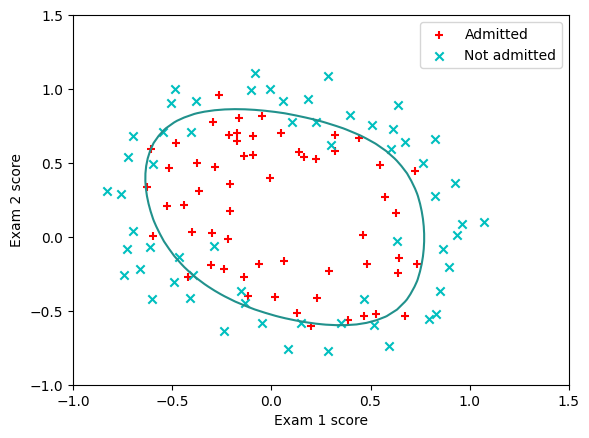

In [ ]:
plt.scatter(X[pos[:, 0],1], X[pos[:, 0], 2], c = "r", marker = "+", label = "Admitted")
plt.scatter(X[neg[:, 0],1], X[neg[:, 0], 2], c = "c", marker = "x", label = "Not admitted")
u_vals = np.linspace(-1, 1.5, 50)
v_vals= np.linspace(-1, 1.5, 50)
z = np.zeros((len(u_vals), len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i, j] = mapFeaturePlot(u_vals[i], v_vals[j], 6) @ theta
plt.contour(u_vals, v_vals, z.T, 0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = 0)